# Regression between sea level height and the timmerman wind data regions for observational data

The regression analysis is executed using zonal and meridional wind data from the 6 Timmerman regions.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs


data_type = 'era5'
model = 'Timmerman'

#### Plot Timmerman regions

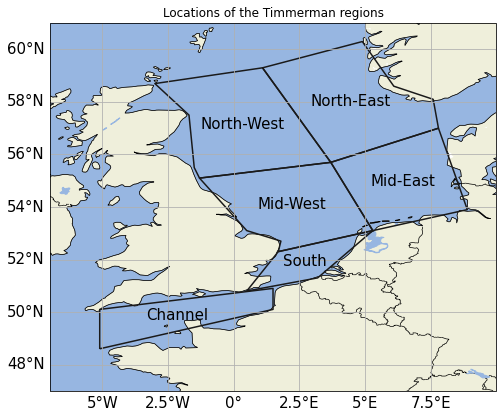

In [2]:
figs.timmerman_regions_plot()

#### Import and plot tide gauge data

In [3]:
# Open data file
tg_data = imprt.import_obs_slh_data()

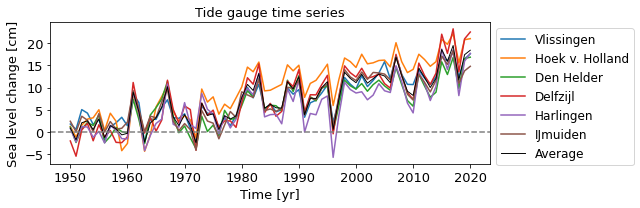

In [4]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [19]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type)

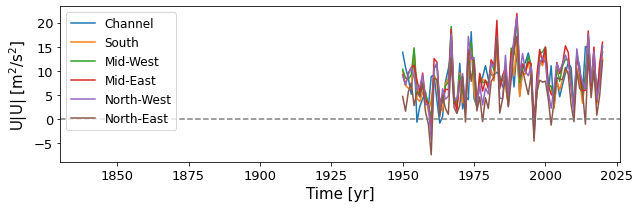

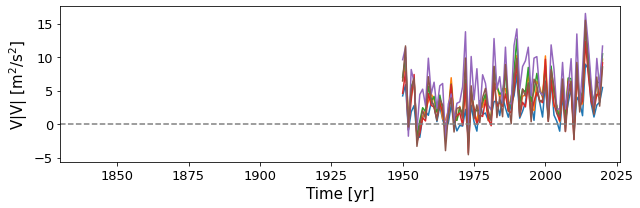

In [6]:
figs.plot_obs_wind_data(wind_data_era5, model = model, data_type = data_type, title = False)

In [21]:
wind_data_era5.to_csv('/Users/iriskeizer/Documents/Wind effect/Dewi/timmerman_era5_wind_data.csv')

In [20]:
wind_data_era5

Channel                                 South  \
     $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$   
time                                                            
1950          13.865215           4.221309           9.956877   
1951          10.753300           5.879201           6.977213   
1952           8.420452          -0.889734           6.439535   
1953           5.165749           1.827155           6.349698   
1954          13.905163           2.771642          14.539727   
...                 ...                ...                ...   
2016           7.907934           3.112924           5.754847   
2017          12.261834           1.065463          11.015908   
2018           5.316123           2.840475           3.099295   
2019           9.759417           3.277354           8.299088   
2020          13.948430           5.469437          12.666558   

                                  Mid-West                     \
     $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$   
time                                                            
1950           6.499025          10.351818           7.028292   
1951           8.881060           8.512563           9.978271   
1952           1.480022           8.263031          -0.368603   
1953           4.157739           9.199275           5.582960   
1954           6.424817          14.788900           6.663285   
...                 ...                ...                ...   
2016           4.498850           6.923596           5.184094   
2017           3.426914          14.169804           3.417031   
2018           4.187985           4.496034           6.309510   
2019           5.658373          10.762005           6.171443   
2020           9.694096          14.985879          10.497395   

               Mid-East                            North-West  \
     $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$   
time                                                            
1950           9.162355           4.604997           9.070927   
1951           7.107512           7.823919           7.131059   
1952           9.587385          -0.866146           9.263136   
1953          10.660437           3.623677          10.659341   
1954          11.220040           7.410996           8.711147   
...                 ...                ...                ...   
2016           6.810984           3.427116           7.597813   
2017          14.964135           2.080100          14.097347   
2018           3.586638           4.432323           3.963554   
2019          11.502511           4.343019           7.833306   
2020          15.976282           9.160690          15.242909   

                                North-East                     
     $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$  
time                                                           
1950           9.621518           4.710401           6.458039  
1951          11.455569           1.636051          11.677615  
1952          -1.794886           5.710905          -0.427646  
1953           8.153859           7.502435           5.207394  
1954           6.271565           2.818026           6.875242  
...                 ...                ...                ...  
2016           6.267682           4.461437           4.732050  
2017           2.171513          10.129291           1.463370  
2018           9.809931           0.817733           7.038953  
2019           5.226647           4.891209           2.687258  
2020          11.654260          12.192869           8.540246  

[71 rows x 12 columns]

### Perform regression

In [8]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(wind_data_era5, 
                                                                                tg_data, 
                                                                                wind_model = model, 
                                                                                data_type = data_type)

In [9]:
r2_df

R$^2$ R$^2_{wind}$ R$^2_{u^2}$ R$^2_{v^2}$ R$^2_{tr}$  \
station                                                                     
Vlissingen       0.855608     0.252433    0.298802    0.008871   0.706408   
Hoek v. Holland  0.920794     0.223068    0.283326    0.046526     0.7783   
Den Helder       0.842055     0.375752     0.36731    0.025179    0.60773   
Delfzijl         0.851371     0.312228    0.339261    0.010165    0.66757   
Harlingen         0.82982     0.461705    0.481743    0.006307   0.522727   
IJmuiden         0.803972     0.302248    0.311717    0.013883   0.635258   
Average          0.889043      0.32488    0.361229    0.002525    0.69565   

                R$^2_{adj}$ R$^2_{adj, wind}$ R$^2_{adj, u^2}$  \
station                                                          
Vlissingen         0.831542          0.127838         0.181935   
Hoek v. Holland    0.910574          0.122819         0.190852   
Den Helder         0.815731          0.271711         0.261861   
Delfzijl           0.839938          0.259322         0.288435   
Harlingen          0.813866           0.41124         0.433157   
IJmuiden           0.788893          0.248575         0.258773   
Average            0.878641          0.261588         0.301344   

                R$^2_{adj, v^2}$ R$^2_{adj, tr}$  
station                                           
Vlissingen             -0.156318        0.657476  
Hoek v. Holland        -0.076503        0.749693  
Den Helder             -0.137291        0.542352  
Delfzijl               -0.065976        0.641998  
Harlingen              -0.086851        0.477983  
IJmuiden               -0.061972        0.607201  
Average                -0.090989        0.667117

In [10]:
results_era5

R$^2$  R$^2_{wind}$  R$^2_{u^2}$  R$^2_{v^2}$      RMSE  \
station                                                                       
Vlissingen       0.855506      0.252430     0.298799     0.008863  1.942977   
Hoek v. Holland  0.920745      0.223065     0.283324     0.046509  1.877270   
Den Helder       0.841978      0.375750     0.367308     0.025162  2.055499   
Delfzijl         0.850613      0.312174     0.339207     0.008603  2.588615   
Harlingen        0.829188      0.461674     0.481712     0.005795  2.260976   
IJmuiden         0.803081      0.302153     0.311605     0.012869  2.307180   
Average          0.888817      0.324862     0.361210     0.002325  1.851074   

                 constant  Channel u$^2$  Channel v$^2$  South u$^2$  \
station                                                                
Vlissingen       7.348812       0.593204       0.423032    -1.154475   
Hoek v. Holland  9.960944       0.376947       0.306250     0.651438   
Den Helder       6.357774       0.087143       0.423501     0.280166   
Delfzijl         7.614678       0.000000       0.000000     0.087152   
Harlingen        5.832838       0.619668       0.000000     0.000000   
IJmuiden         7.142322       0.257784       0.361217     0.000000   
Average          7.376228       0.345940       0.088579     0.000000   

                 South v$^2$  Mid-West u$^2$  Mid-West v$^2$  Mid-East u$^2$  \
station                                                                        
Vlissingen         -0.634984       -0.000000        0.000000        2.943382   
Hoek v. Holland    -0.616772        0.000000        0.000000        1.793868   
Den Helder         -1.315163        0.000000        1.794402        2.941879   
Delfzijl            0.000000        0.000000        0.000000        2.673195   
Harlingen          -0.000000        0.790248       -0.000000        1.212814   
IJmuiden            0.000000        0.000000        0.000000        1.707106   
Average            -0.000000        0.245921        0.000000        1.881193   

                 Mid-East v$^2$  North-West u$^2$  North-West v$^2$  \
station                                                               
Vlissingen             -0.00000          1.763055         -1.459209   
Hoek v. Holland        -0.38537         -0.000000         -0.421700   
Den Helder             -0.00000          0.000000         -1.496390   
Delfzijl               -0.00000          0.000000         -0.291487   
Harlingen              -0.00000          0.627608         -0.737554   
IJmuiden               -0.00000          0.000000         -0.812922   
Average                -0.00000          0.000000         -0.787304   

                 North-East u$^2$  North-East v$^2$     trend  
station                                                        
Vlissingen              -2.364195          0.633996  4.009909  
Hoek v. Holland         -0.000000          0.000000  5.580470  
Den Helder              -1.090700         -0.151155  3.580969  
Delfzijl                 0.000000         -0.229972  4.875680  
Harlingen                0.000000         -0.000000  3.307779  
IJmuiden                -0.000000          0.000000  3.670578  
Average                 -0.000000         -0.000000  4.181198

In [11]:
timeseries_era5

Vlissingen                                                       \
     Channel u$^2$ Channel v$^2$ South u$^2$ South v$^2$ Mid-West u$^2$   
time                                                                      
1950      0.782997      0.348054   -0.701550   -0.575026           -0.0   
1951      0.359117      0.641938    0.212965   -1.098271            0.0   
1952      0.041355     -0.557948    0.377989    0.527466            0.0   
1953     -0.401975     -0.076342    0.405561   -0.060731           -0.0   
1954      0.788438      0.091081   -2.108112   -0.558725           -0.0   
...            ...           ...         ...         ...            ...   
2016     -0.028456      0.151578    0.588132   -0.135660            0.0   
2017      0.564597     -0.211363   -1.026586    0.099805           -0.0   
2018     -0.381492      0.103283    1.403171   -0.067375            0.0   
2019      0.223738      0.180725   -0.192743   -0.390365           -0.0   
2020      0.794332      0.569302   -1.533202   -1.276866           -0.0   

                                                                    \
     Mid-West v$^2$ Mid-East u$^2$ Mid-East v$^2$ North-West u$^2$   
time                                                                 
1950            0.0      -0.046001           -0.0         0.163146   
1951            0.0      -1.288479           -0.0        -0.536293   
1952           -0.0       0.210997            0.0         0.232449   
1953            0.0       0.859826           -0.0         0.735864   
1954            0.0       1.198195           -0.0         0.033424   
...             ...            ...            ...              ...   
2016            0.0      -1.467777           -0.0        -0.368000   
2017           -0.0       3.462092            0.0         1.975471   
2018            0.0      -3.417404           -0.0        -1.678368   
2019            0.0       1.368993           -0.0        -0.283091   
2020            0.0       4.074095           -0.0         2.388515   

                       ...   Average                                        \
     North-West v$^2$  ...     trend      total wind total   Channel South   
time                   ...                                                   
1950        -1.202985  ... -7.140755  -7.221917  -0.081162  0.529502   0.0   
1951        -1.842287  ... -6.936733  -8.442612  -1.505879  0.343844   0.0   
1952         2.776473  ... -6.732712  -5.238351   1.494361 -0.092713   0.0   
1953        -0.691398  ... -6.528690  -6.597481  -0.068791 -0.250406   0.0   
1954        -0.035280  ... -6.324668  -4.789930   1.534738  0.478867   0.0   
...               ...  ...       ...        ...        ...       ...   ...   
2016        -0.033926  ...  6.324668   5.264766  -1.059903  0.015144   0.0   
2017         1.393891  ...  6.528690  10.053905   3.525215  0.285000   0.0   
2018        -1.268661  ...  6.732712   3.412543  -3.320168 -0.200849   0.0   
2019         0.328951  ...  6.936733   8.247601   1.310868  0.168320   0.0   
2020        -1.911545  ...  7.140755   9.615519   2.474765  0.582440   0.0   

                                                             
      Mid-West  Mid-East North-West u$^2$ total v$^2$ total  
time                                                         
1950  0.067797 -0.029401  -0.649060    0.495018   -0.576181  
1951 -0.032231 -0.823501  -0.993990   -0.646306   -0.859573  
1952 -0.045802  0.134853   1.498022    0.113168    1.381193  
1953  0.005116  0.549537  -0.373038    0.320233   -0.389023  
1954  0.309108  0.765798  -0.019035    1.534702    0.000037  
...        ...       ...        ...         ...         ...  
2016 -0.118647 -0.938095  -0.018305   -1.073338    0.013435  
2017  0.275439  2.212715   0.752062    2.817411    0.707804  
2018 -0.250671 -2.184153  -0.684495   -2.657300   -0.662869  
2019  0.090105  0.874960   0.177483    1.095542    0.215325  
2020  0.319821  2.603862  -1.031358    3.386915   -0.912151  

[71 rows x 154

In [12]:
timeseries_era5['Average'].max()

Channel u$^2$        0.794967
Channel v$^2$        0.248351
South u$^2$          0.000000
South v$^2$         -0.000000
Mid-West u$^2$       0.656763
Mid-West v$^2$       0.000000
Mid-East u$^2$       4.896359
Mid-East v$^2$      -0.000000
North-West u$^2$     0.000000
North-West v$^2$     1.572861
North-East u$^2$    -0.000000
North-East v$^2$    -0.000000
trend                7.140755
total               10.053905
wind total           5.129472
Channel              0.815730
South                0.000000
Mid-West             0.656763
Mid-East             4.896359
North-West           1.572861
u$^2$ total          6.046191
v$^2$ total          1.463506
dtype: float64

In [13]:
timeseries_era5['Average'].std()

Channel u$^2$       0.348402
Channel v$^2$       0.089210
South u$^2$         0.000000
South v$^2$         0.000000
Mid-West u$^2$      0.247671
Mid-West v$^2$      0.000000
Mid-East u$^2$      1.894582
Mid-East v$^2$      0.000000
North-West u$^2$    0.000000
North-West v$^2$    0.792908
North-East u$^2$    0.000000
North-East v$^2$    0.000000
trend               4.210958
total               5.187616
wind total          2.419691
Channel             0.409636
South               0.000000
Mid-West            0.247671
Mid-East            1.894582
North-West          0.792908
u$^2$ total         2.356078
v$^2$ total         0.733907
dtype: float64

In [14]:
significance_era5

Vlissingen  Hoek v. Holland  Den Helder  Delfzijl  \
reggression_contributor                                                      
Channel u$^2$                  True             True        True      True   
Channel v$^2$                  True             True        True      True   
South u$^2$                    True             True        True      True   
South v$^2$                    True             True        True      True   
Mid-West u$^2$                 True             True        True      True   
Mid-West v$^2$                 True             True        True      True   
Mid-East u$^2$                 True             True        True      True   
Mid-East v$^2$                 True             True        True      True   
North-West u$^2$               True             True        True      True   
North-West v$^2$              False            False       False     False   
North-East u$^2$               True             True        True      True   
North-East v$^2$              False            False       False     False   
trend                          True             True        True      True   
total                          True             True        True      True   
wind total                     True             True        True      True   

                         Harlingen  IJmuiden  Average  
reggression_contributor                                
Channel u$^2$                 True      True     True  
Channel v$^2$                 True      True     True  
South u$^2$                   True      True     True  
South v$^2$                   True      True     True  
Mid-West u$^2$                True      True     True  
Mid-West v$^2$                True      True     True  
Mid-East u$^2$                True      True     True  
Mid-East v$^2$                True      True     True  
North-West u$^2$              True      True     True  
North-West v$^2$             False     False    False  
North-East u$^2$              True      True     True  
North-East v$^2$             False     False    False  
trend                         True      True     True  
total                         True      True     True  
wind total                    True      True     True

#### Plot regression results

FileNotFoundError: [Errno 2] No such file or directory: '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/fullperiod/observations/Timmerman/era5/R$^2$_per_station.png'

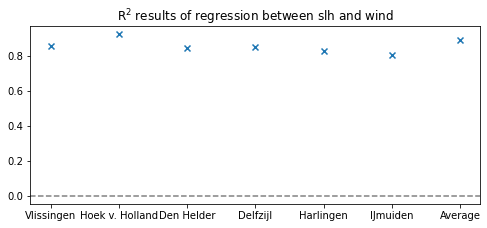

In [15]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

In [ ]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

In [ ]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

In [ ]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False)

In [ ]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'total'], model, data_type)

In [ ]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'u$^2$ total', 'v$^2$ total'], model, data_type)

In [ ]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

In [ ]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

In [ ]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [3]:
data_type = '20cr'

#### Import and plot tide gauge data

In [4]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type)

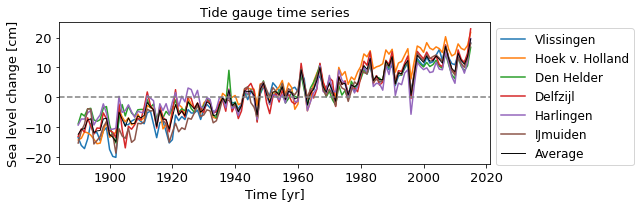

In [5]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [7]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [8]:
wind_data_20cr

Channel                                 South  \
     $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$   
time                                                            
1836           9.398874          -1.218150           6.401690   
1837           3.329904           0.750914           2.035330   
1838           0.329219          -0.767287          -0.266823   
1839           4.823160           0.552025           2.080075   
1840           0.741866          -0.182480           4.820944   
...                 ...                ...                ...   
2011          10.969078           3.115381           8.155463   
2012          10.027008           1.991190           6.809952   
2013           3.313218           1.547087           2.263472   
2014          10.876112           6.425111           5.115736   
2015          10.918869           6.242378          10.573762   

                                  Mid-West                     \
     $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$   
time                                                            
1836           0.310869           6.692063          -1.423788   
1837           1.325370           3.044824           1.955889   
1838          -0.360828          -1.300336          -1.106671   
1839           0.976965           2.073684           1.277253   
1840          -0.441465           6.431440          -1.902902   
...                 ...                ...                ...   
2011           3.485028          13.435661           6.483733   
2012           2.736764          10.189938           1.982328   
2013           2.715020           5.177427           4.285154   
2014           9.385818           7.802488          13.314934   
2015           5.000158          17.265608           6.761311   

               Mid-East                            North-West  \
     $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$   
time                                                            
1836           5.914341          -0.938669           4.039640   
1837           1.566807           1.638099           2.953883   
1838          -1.807967          -0.944153          -0.071450   
1839          -0.375581           1.146095           1.792541   
1840           8.379648          -2.250757           6.112606   
...                 ...                ...                ...   
2011          13.715880           5.262648          14.429358   
2012          10.420673           2.108283          10.758274   
2013           5.956827           3.209796           8.885650   
2014           5.428218          11.872807           7.111277   
2015          18.294571           4.461973          18.431528   

                                North-East                     
     $v \sqrt{u^2+v^2}$ $u \sqrt{u^2+v^2}$ $v \sqrt{u^2+v^2}$  
time                                                           
1836          -1.211254           2.221467          -1.732220  
1837           2.951589           0.155643           3.296363  
1838           1.847939          -2.106020           0.592806  
1839           3.554612          -1.421507           3.026562  
1840          -2.001526           4.964725          -2.783268  
...                 ...                ...                ...  
2011          11.633640          10.596898           9.564071  
2012           0.440513           6.598078           2.038419  
2013           7.610978           6.540488           5.776588  
2014          17.830263           0.915726          18.478556  
2015           9.313465          13.466646           8.660346  

[180 rows x 12 columns]

In [9]:
wind_data_20cr.to_csv('/Users/iriskeizer/Documents/Wind effect/Dewi/timmerman_20cr_wind_data.csv')

In [ ]:
figs.plot_obs_wind_data(wind_data_20cr, model = model, data_type = data_type, title = False)

### Perform regression

In [ ]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = data_type)

In [ ]:
r2_df

In [ ]:
results_20cr

In [ ]:
timeseries_20cr['Average']

In [ ]:
timeseries_20cr['Average'].max()

In [ ]:
timeseries_20cr['Average'].std()

In [ ]:
significance_20cr.T

In [ ]:
import xarray as xr
test = xr.Dataset.from_dataframe(significance_20cr.T).rename({'index':'station'})

In [ ]:
test

#### Plot regression results

In [ ]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

In [ ]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

In [ ]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

In [ ]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False)

In [ ]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total', 'total'], model, data_type)

In [ ]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total'], model, data_type)

In [ ]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

In [ ]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

In [ ]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)

#### Calculate trends

In [ ]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

periods = ['1950-2015', '1950-2020', '1836-2015', '1890-2015']
df = pd.DataFrame({'period':periods, 'trend': [np.nan, np.nan, np.nan, np.nan], 'se': [np.nan, np.nan, np.nan, np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).slope*10
df['ERA5', 'trend']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).slope*10

# ERA5 standard errors
df['ERA5', 'se']['1950-2015'] = linregress(timeseries_era5.loc[1950:2015].index, timeseries_era5['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['ERA5', 'se']['1950-2020'] = linregress(timeseries_era5.index, timeseries_era5['Average', 'wind total'].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).slope*10
df['20CRv3', 'trend']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).slope*10
df['20CRv3', 'trend']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).slope*10


# 20CRv3 standard errors
df['20CRv3', 'se']['1950-2015'] = linregress(timeseries_20cr.loc[1950:2015].index, timeseries_20cr['Average', 'wind total'].loc[1950:2015].values).stderr*10
df['20CRv3', 'se']['1836-2015'] = linregress(timeseries_20cr.index, timeseries_20cr['Average', 'wind total'].values).stderr*10
df['20CRv3', 'se']['1890-2015'] = linregress(timeseries_20cr.loc[1890:2015].index, timeseries_20cr['Average', 'wind total'].loc[1890:2015].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend']['1950-2015'] = linregress(tg_data.loc[1950:2015].index, tg_data['Average'].loc[1950:2015].values).slope*10
df['tg_data', 'trend']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).slope*10
df['tg_data', 'trend']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se']['1950-2015'] = linregress(tg_data.loc[1950:2015].index, tg_data['Average'].loc[1950:2015].values).stderr*10
df['tg_data', 'se']['1890-2015'] = linregress(tg_data.loc[1890:2015].index, tg_data['Average'].loc[1890:2015].values).stderr*10
df['tg_data', 'se']['1950-2020'] = linregress(tg_data.loc[1950:2020].index, tg_data['Average'].loc[1950:2020].values).stderr*10



df


In [ ]:
(0.42/2.2)*100

### 